In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(f"TensorFlow: {tf.__version__}\nKeras: {keras.__version__}")


TensorFlow: 2.18.0
Keras: 3.6.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
class_names[y_train[0]]

'Ankle boot'

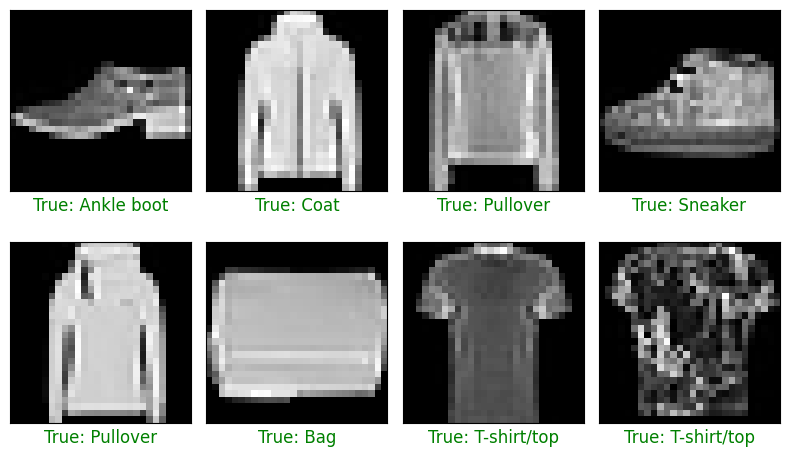

In [9]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
    nrows, ncolds = 2, 4
    fig, axes = plt.subplots(nrows, ncolds, figsize=(8, 5))


    len_x = x_data.shape[0]
    for idx in range(nrows*ncolds):
      ax = axes[idx // ncolds, idx % ncolds]

      img_idx = random.randint(0, len_x)

      ax.imshow(x_data[img_idx], cmap='gray')
      ax.set(xticks=[], yticks=[])

      true_label_str = f"True: {class_names[y_data[img_idx]]}"
      ax.set_xlabel(true_label_str, color="green", fontsize=12)

    plt.tight_layout()
    plt.show()



plot_data(x_train, y_train)

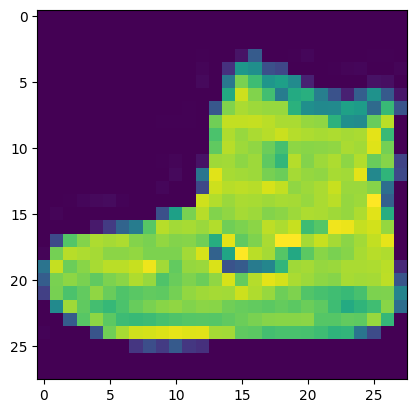

In [10]:
plt.imshow(x_train[0])

In [11]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32 ) /255

In [12]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('float32'))

In [13]:
x_train = np.expand_dims(x_train, axis=-1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test = np.expand_dims(x_test, axis=-1)

In [16]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
y_train_label = keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_test_label = keras.utils.to_categorical(y_test, num_classes=len(class_names))

In [18]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [19]:
input_shape= (28,28,1)

In [20]:
# Định nghĩa tham số đầu vào
input_shape = (28, 28)  # Ví dụ với dữ liệu Fashion MNIST hoặc MNIST

# Xây dựng mô hình ANN
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape),  # Chuyển đầu vào 2D thành vector
    layers.Dense(128, activation='relu'),    # Lớp Dense với 128 neuron và hàm kích hoạt ReLU
    layers.Dense(10, activation='softmax')   # Lớp đầu ra với 10 lớp (phân loại)
])

# In thông tin chi tiết về mô hình
model.summary()

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
epochs = 10  # Corrected the typo from 'epchos' to 'epochs'
batch_size = 128

history=model.fit(x_train, y_train_label,
          epochs=epochs,  # Ensure the argument name matches correctly
          batch_size=batch_size,
          validation_split=0.1
          )


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7322 - loss: 0.7700 - val_accuracy: 0.8302 - val_loss: 0.4934
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8450 - loss: 0.4376 - val_accuracy: 0.8405 - val_loss: 0.4302
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.3777 - val_accuracy: 0.8612 - val_loss: 0.3811
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8757 - loss: 0.3466 - val_accuracy: 0.8678 - val_loss: 0.3711
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.3224 - val_accuracy: 0.8682 - val_loss: 0.3571
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8889 - loss: 0.3029 - val_accuracy: 0.8817 - val_loss: 0.3396
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8927 - loss: 0.2920 - val_accuracy: 0.8760 - val_loss: 0.3519
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.2807 - val_accuracy: 0.

In [23]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.791685163974762, 0.8504815101623535, 0.8647407293319702, 0.8753703832626343, 0.8820925951004028, 0.8881852030754089, 0.8921666741371155, 0.8974074125289917, 0.9004074335098267, 0.9037222266197205], 'loss': [0.5949772000312805, 0.42225900292396545, 0.37383317947387695, 0.3438364863395691, 0.32298922538757324, 0.3046623766422272, 0.2935880422592163, 0.2814920246601105, 0.2717239260673523, 0.2625423073768616], 'val_accuracy': [0.8301666378974915, 0.840499997138977, 0.8611666560173035, 0.8678333163261414, 0.8681666851043701, 0.8816666603088379, 0.8759999871253967, 0.8765000104904175, 0.8794999718666077, 0.8546666502952576], 'val_loss': [0.49336591362953186, 0.43016716837882996, 0.38105636835098267, 0.371116578578949, 0.35706156492233276, 0.3396023213863373, 0.3519027531147003, 0.3406749665737152, 0.33817628026008606, 0.3935527801513672]}


In [24]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
# Extract training and validation loss
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']

# Extract training and validation accuracy
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']


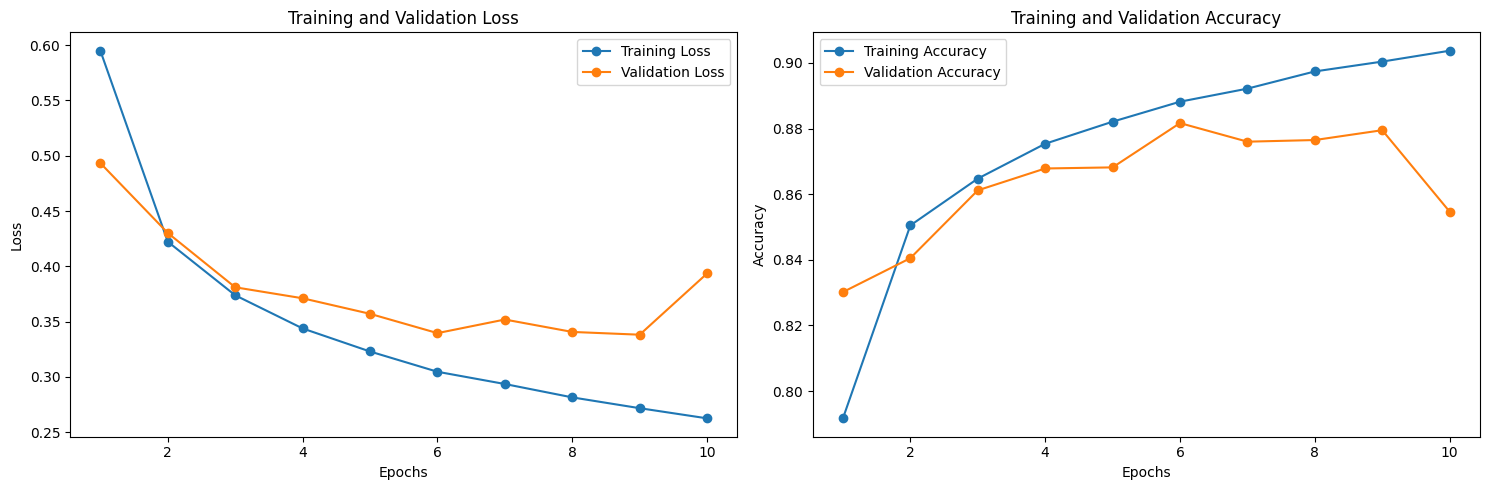

In [26]:
import matplotlib.pyplot as plt

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Epoch numbers
epoch_runs = [i + 1 for i in range(len(train_loss))]

# Plot Training and Validation Loss
ax1.plot(epoch_runs, train_loss, label='Training Loss', marker='o')
ax1.plot(epoch_runs, val_loss, label='Validation Loss', marker='o')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot Training and Validation Accuracy
ax2.plot(epoch_runs, train_acc, label='Training Accuracy', marker='o')
ax2.plot(epoch_runs, val_acc, label='Validation Accuracy', marker='o')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()
